## New Wind Method
Need to try implementing the new wind method, where we project the set of drones onto a wind vector.

I think I should start by getting some simple illustrations of a set of drones. These can be fixed in location, and then I can randomly select and display a wind vector, then display the projection. 

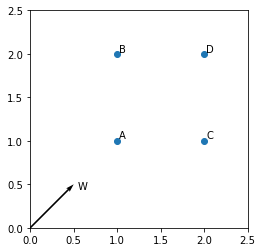

In [42]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
plt.ylim(0,2.5)
plt.xlim(0,2.5)
plt.gca().set_aspect('equal', adjustable='box')

drone_x      = [1, 1, 2, 2]
drone_y      = [1, 2, 1, 2]
drone_labels = ['A', 'B', 'C', 'D']

drone_scatter = plt.scatter(drone_x, drone_y)

for i in range(4):
    plt.text(drone_x[i]+0.025, drone_y[i]+0.025, drone_labels[i])
    
wind = np.asarray([0.5, 0.5])

plt.quiver(0,0, wind[0], wind[1], angles='xy', scale_units='xy', scale=1)
plt.text(wind[0]+0.05, wind[1]-0.05, 'W')
plt.show()


This works! We have 4 drones, and can move the wind vector around.

In [48]:
drones = np.asarray([[drone_x[i], drone_y[i]] for i in range(4)])
projections = np.dot(drones, -1*wind)

print(projections)

[-1.  -1.5 -1.5 -2. ]


Great! Now to just figure out a quick way to turn that a vector of scaling factors. Want to make sure that there is a 'minimum' scaling factor. The 'closest' projection gets 100% of the wind, or a scaling factor of 1. If we have some minimum, say 50%, or 0.5, then we want all the other drones 'in between' to have scaling factors between 1 and 0.5.

In [53]:
max_scaling = 1.0
min_scaling = 0.5
scale_range = max_scaling - min_scaling

max_proj   = projections.max()
min_proj   = projections.min()
proj_range = max_proj - min_proj

# NewValue = (((OldValue - OldMin) * NewRange) / OldRange) + NewMin
# Thanks SO. 
scaling_factors = [((p - min_proj)*scale_range/proj_range)+min_scaling for p in projections]
labels_and_factors = [[drone_labels[i], scaling_factors[i]] for i in range(4)]

print(labels_and_factors)

[['A', 1.0], ['B', 0.75], ['C', 0.75], ['D', 0.5]]
